In [1]:
import copy,math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [3]:
#data is stored in numpy array/matrix
print(f"X shape: {x_train.shape}, X type: {type(x_train)}")
print(x_train)
print(f"Y shape: {y_train.shape}, Y type: {type(y_train)}")
print(y_train)


X shape: (3, 4), X type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y shape: (3,), Y type: <class 'numpy.ndarray'>
[460 232 178]


# Paramete Vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [13]:
#For demonstration,  𝐰  and  𝑏  will be loaded with some initial selected 
#values that are near the optimal.  
#𝐰  is a 1-D NumPy vector.
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


# Model Prediction with Multiple Variables

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

**Single Prediction element by element**

In [17]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    #finding total numbers of training examples
    n = len(x)
    p = 0
    
    for i in range (n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p


In [18]:
#Get a row from our training data
#it will give us all the values from traing example 1
            #means give values of all column of row 1
x_vec = x_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]


In [19]:
#making a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"prediction = {f_wb}")

prediction = 459.9999976194083


**Single Prediction, Vector**

Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.


In [20]:
def predict(x, w, b):
    p = np.dot(x,w) + b
    return p

In [21]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec: {x_vec}")

x_vec: [2104    5    1   45]


In [22]:
#making a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"Prediction : {f_wb}")

Prediction : 459.9999976194082


# Computing Cost with Multiple Variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In [39]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [43]:
#compute and display cost using our pre-chosen optimal parameters
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Cost at Optimal W: {cost}")

Cost at Optimal W: 1.5578904330213735e-12


# Gradient Descent With Multiple Variables

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [50]:
def compute_gradient(x, y, w, b):
    #finding the numbers of training examples
    
    m,n = x.shape
    
    #initializing a array of zeros to store values 
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    
    #in this loop we will find the part that is same for the both dj_dw and di_db
    for i in range(m):
                #f(x) - y[i]
                #and f(x) = w*x + b
        err = (np.dot(x[i], w) + b) - y[i]
        
        
        #In this loop we will find the part for the dj_dw
        for j in range(n):
                                #err * x[i,j]
            dj_dw[j] = dj_dw[j] + err * x[i,j]
            
        dj_db = dj_db + err
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [51]:
#Compute and display Gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_db at initial w, b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: {tmp_dj_dw}")

dj_db at initial w, b: -1.6739251122999121e-06
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


**Gradient Descent**

We have found the parts of gradient descent now it is time to use them to find complete gradient descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [52]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in
    
    for i in range (num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x, y, w, b)
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            
        # Print cost every at intervals 10 times or as many iterations if < 10   
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost: {J_history[-1]:8.2f}")
    return w, b, J_history
    

Testing

In [55]:
#initializing parameters
initial_w = np.zeros_like(w_init)
initial_b = 0

#gradient descent settings
iterations = 1000
alpha = 5.0e-7

#run the gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w,
                                            initial_b, compute_cost, 
                                            compute_gradient,
                                            alpha, iterations)


                                           

Iteration    0: Cost:  2529.46
Iteration  100: Cost:   695.99
Iteration  200: Cost:   694.92
Iteration  300: Cost:   693.86
Iteration  400: Cost:   692.81
Iteration  500: Cost:   691.77
Iteration  600: Cost:   690.73
Iteration  700: Cost:   689.71
Iteration  800: Cost:   688.70
Iteration  900: Cost:   687.69


In [57]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 


# Making Prediction using Model We have Designed

In [60]:
m,_ = x_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(x_train[i], w_final) + b_final: 0.2f}, and target value: {y_train[i]}")

Prediction:  426.19, and target value: 460
Prediction:  286.17, and target value: 232
Prediction:  171.47, and target value: 178


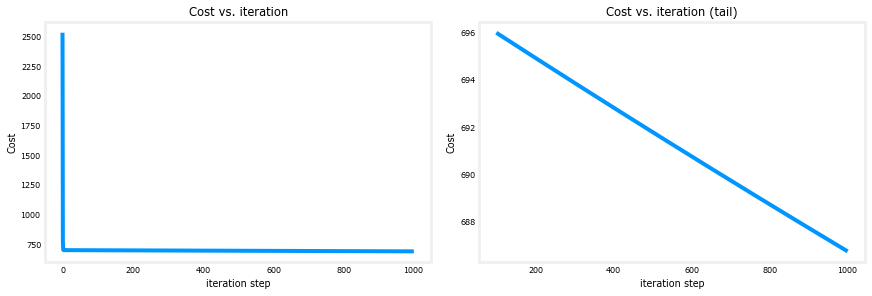

In [61]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()